In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
crimeratedata = pd.read_csv('final_crimes.csv')
crimeratedata.head()

,state_abbr,year,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime,crime_rate
0,AL,2017,4875120,25469,419,2001,4233,18816,143774,31270,99707,12797,338486,6.943132
1,AL,2018,4887681,25567,383,2032,4047,19105,138702,29101,96328,13273,328538,6.721756
2,AL,2019,4903185,25046,358,2068,3941,18679,131133,26079,92477,12577,312358,6.370512
3,AK,2017,739786,6338,62,1074,952,4250,26203,4167,17782,4254,65082,8.797409
4,AK,2018,735139,6555,47,1212,896,4400,24345,3985,16364,3996,61800,8.406573


In [3]:
de = crimeratedata['state_abbr']=='DE'

In [4]:
decrimerate = crimeratedata.loc[de]
decrimerate

,state_abbr,year,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime,crime_rate
21,DE,2017,957078,4377,51,351,1082,2893,23430,3960,18108,1362,55614,5.810812
22,DE,2018,965479,4079,46,334,861,2838,22405,3154,17780,1471,52968,5.486189
23,DE,2019,973764,4115,48,310,790,2967,21931,2968,17359,1604,52092,5.349551
329,DE,1995,717000,5198,25,575,1425,3173,31790,6491,22329,2970,73976,10.317434
330,DE,1996,725000,4845,31,454,1304,3056,30643,5830,21665,3148,70976,9.789793
331,DE,1997,732000,5753,22,428,1783,3520,36578,6421,25904,4253,84662,11.565847
332,DE,1998,744000,5672,21,499,1445,3707,34230,6395,24649,3186,79804,10.726344
333,DE,1999,753538,5534,24,529,1492,3489,30922,5245,22634,3043,72912,9.675955
334,DE,2000,783600,5363,25,424,1394,3520,29727,5216,21360,3151,70180,8.956100
335,DE,2001,796599,4868,23,420,1156,3269,27399,5144,19476,2779,64534,8.101190


In [5]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = decrimerate.year.values.reshape(-1, 1)
y = decrimerate.crime_rate.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (25, 1) (25, 1)


array([[2017],
       [2018],
       [2019],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]])

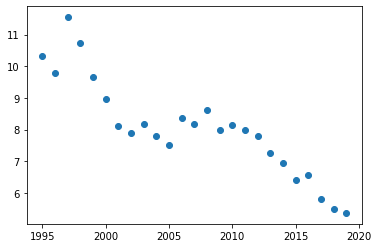

In [6]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [7]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [8]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [9]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 0.6570029045479665
R-squared (R2 ): 0.4268304712560802


In [11]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.4268304712560802

In [12]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8502781083610702
Testing Score: 0.4268304712560802


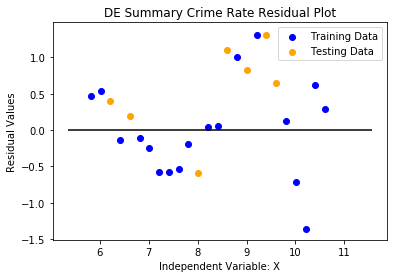

In [13]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("DE Summary Crime Rate Residual Plot")
plt.xlabel('Independent Variable: X')
plt.ylabel('Residual Values')
plt.savefig('de_summary_crimerate_residualplot.png')
### END SOLUTION

In [14]:
# This residual plot gives an visual understanding of how "good" your predicted values are. 
# Positive values for the residual (on the y-axis) mean the prediction was too low. 
# Negative values mean the prediction was too high. 
# 0 means the guess was exactly correct.

In [15]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1995]]
Max X Value: [[2019]]


In [16]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

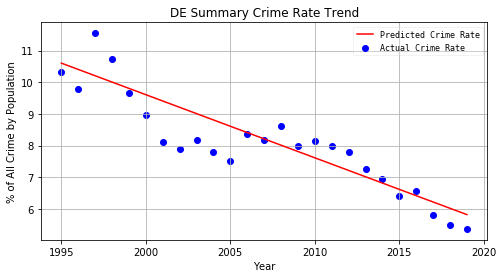

In [17]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title("DE Summary Crime Rate Trend")
plt.xlabel("Year")
plt.ylabel("% of All Crime by Population")
plt.grid(True)
plt.gcf().set_size_inches(8,4)
plt.legend(('Predicted Crime Rate', 'Actual Crime Rate'), loc='best', framealpha=0.25, prop={'size':'small', 'family':'monospace'})
plt.savefig('de_summary_crimerate_trend.png')
### END SOLUTION

In [18]:
prediction = model.predict([[1995]])
prediction

array([[10.60371362]])

In [19]:
prediction1 = model.predict([[2000]])
prediction1

array([[9.6069098]])

In [20]:
prediction2 = model.predict([[2005]])
prediction2

array([[8.61010597]])

In [21]:
prediction3 = model.predict([[2010]])
prediction3

array([[7.61330215]])

In [22]:
prediction4 = model.predict([[2015]])
prediction4

array([[6.61649833]])

In [23]:
prediction5 = model.predict([[2020]])
prediction5

array([[5.61969451]])